<h1>Exercise B.1 by Severin Wyss<h1>
<h2>Training a more suffisticated Model<h2>
Task: Wenn du möchtest, kannst du anschliessend in einem neuen Jupyter Notebook oder Skript ein besseres Modell trainieren und evaluieren, das alle im Datenset vorhanden Features verwendet und/oder mit NLP-Ansätzen den Inhalt des Fragetextes für die Prediction nutzt.
Kurzbeschreibung der Features:
<ol>
  <li>QuestionText ist der Fragetext als String.</li>
  <li>ProductGroup1Id, BrandId, CategoryManagementTeamBudgetingGroupId und CategoryManagementTeamId sind kategorische Features.</li>
  <li>Alle anderen Features sind numerisch.</li>
</ol> 

In [1]:
#load data
import pandas as pd
import numpy as np
data = pd.read_csv('juniorMLE_dataset.csv')
data.head()

IsQuestionForCommunity  VerifiedBuyers  VisitsLastYear  QuestionTextLength  \
0                       1              44           65724                  77   
1                       1               2              18                  89   
2                       1              38            1324                  40   
3                       0              47             145                 155   
4                       0              37            3127                 139   

   ProductGroup1Id  BrandId  CategoryManagementTeamBudgetingGroupId  \
0                1    15151                                      23   
1               80    16030                                      18   
2               80      778                                      46   
3              388      378                                      71   
4              389        5                                      56   

   CategoryManagementTeamId  \
0                         5   
1                         8   
2                         8   
3                         4   
4                         3   

                                        QuestionText  ProductLifecycleDays  \
0  Geht die Kamera beim Klingeln an oder auch wen...                   166   
1  Welche Häkelnadel kann man für dieses Garn bra...                  1239   
2           Handelt es sich bei der flasche um glas?                   117   
3  Genau nach 3 Jahren habe ich einen defekten Bi...                  1356   
4  Überall steht, dass dieser Rechner sehr laut s...                    77   

   ...  VerifiedBuyersLastYear  VerifiedBuyersWithLanguage  \
0  ...                      44                          30   
1  ...                       0                           2   
2  ...                      38                          33   
3  ...                       1                          37   
4  ...                      37                          32   

   VerifiedBuyersWithLanguageAnswersTotalScore  \
0                                            5   
1                                            0   
2                                            2   
3                                            4   
4                                            4   

   VerifiedBuyersWithLanguageBestAnswers  \
0                                     12   
1                                      1   
2                                      1   
3                                      0   
4                                      7   

   VerifiedBuyersWithLanguageHaveAnswered  \
0                                      11   
1                                       2   
2                                       2   
3                                       5   
4                                       8   

   VerifiedBuyersWithLanguageLastMonth  VerifiedBuyersWithLanguageLastYear  \
0                                    4                                  30   
1                                    0                                   0   
2                                   29                                  33   
3                                    0                                   1   
4                                   10                                  32   

   VerifiedBuyersWithLanguageTotalAnswers  \
0                                      48   
1                                       4   
2                                      11   
3                                       5   
4                                      22   

   VerifiedBuyersWithLanguageTotalAnswersAsVerifiedBuyers  VisitsLastMonth  
0                                                 41                   364  
1                                                  3                     6  
2                                                 11                   961  
3                                                  2                     2  
4                                                 22                  1576  

[5 rows x 28 columns

In [2]:
#clean data (or here check that they are clean)
print('nan\'s per column:\n' + str(data.isna().sum())) #no nan's found
print(data.IsQuestionForCommunity.unique()) # controll if only the two labels, no invalid values
print(data.dtypes) #controll if all integers
print('number of VisitsLastYear < 0 points: '+str(data[data.VisitsLastYear <0].VisitsLastYear.count())) # controll if valid values (x<0)
print('number of QuestionTextLength < 0 points: '+str(data[data.QuestionTextLength <0].QuestionTextLength.count())) # controll if valid values (x<0)

nan's per column:
IsQuestionForCommunity                                    0
VerifiedBuyers                                            0
VisitsLastYear                                            0
QuestionTextLength                                        0
ProductGroup1Id                                           0
BrandId                                                   0
CategoryManagementTeamBudgetingGroupId                    0
CategoryManagementTeamId                                  0
QuestionText                                              0
ProductLifecycleDays                                      0
ProductQuestions                                          0
ProductQuestionsFractionAnswered                          0
ProductQuestionsFractionAnsweredWithinWeek                0
ProductQuestionsHaveNonEmployeeAnswers                    0
ProductQuestionsHaveNonEmployeeAnswersWithinWeek          0
ProductQuestionsNonEmployeeAnswers                        0
ProductQuestionsNonEmp

In [ ]:
# Simple rebalancing of dataset. penalising the False "IsQuestionForCommunity" == 0 could be a better alternative
minority = data[data["IsQuestionForCommunity"] == 0]
majority = data[data["IsQuestionForCommunity"] == 1].sample(n=len(minority))
data = pd.concat([minority,majority]).reset_index(drop=True)

# data splitting
from sklearn.model_selection import train_test_split
X=data[['VisitsLastYear','QuestionTextLength']] #TODO
y=data['IsQuestionForCommunity']
print(y.value_counts()) # balance check
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.1, random_state=2021) #testset  (intentionally ommiting crossvalidation, not the point of the exercise)

In [122]:
# train model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='adam', alpha=0.5, hidden_layer_sizes=(4,4), random_state=1)
model.fit(X_train, y_train)

MLPClassifier(alpha=0.5, hidden_layer_sizes=(4, 4), random_state=1)

In [123]:
# prediction sample
print(X_test[143:145])
print(y_test[143:145])
print(model.predict(X_test[143:145]))
sample_analysis = pd.concat([X_test[143:145],y_test[143:145]], axis=1)
sample_analysis['prediction'] = model.predict(X_test[143:145])
print(sample_analysis)

       VisitsLastYear  QuestionTextLength
9986             1622                  28
18615             174                  68
9986     0
18615    0
Name: IsQuestionForCommunity, dtype: int64
[1 0]


[1 0]
F1 score: 0.7230851633636852 and f2 score: 0.7460212201591512


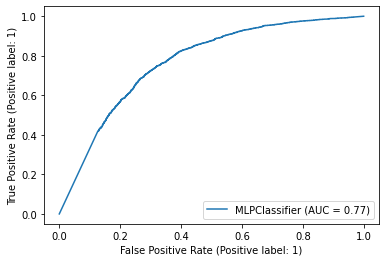

In [136]:
# mini eval
from sklearn import metrics
y_test_pred = pd.DataFrame(model.predict(X_test))
print(pd.DataFrame(y_test_pred)[0].unique()) #sanity check, catch majority class predicting classifier
f1_score = metrics.f1_score(y_test, y_test_pred)
f2_score = metrics.fbeta_score(y_test, y_test_pred,beta=2) # beta < 1 lends more weight to precision, while beta > 1 favors recall
print("F1 score: {} and f2 score: {}".format(f1_score,f2_score))
metrics.plot_roc_curve(model,X_test,y_test)


In [138]:
# save model (for sklearn, joblib is supposetly more efficient than pickle)
from joblib import dump
import sklearn
dump(model, 'model.joblib') 
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.1.


In [137]:
# testing input to model as will be done by flask 
test_input = np.array([[500,20]])
print(model.predict(test_input))

[0]
